In [1]:
import numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

def r(x, y, xp, yp):
    r = np.sqrt((x*10**(-2) - xp*10**(-3))**2 + (y*10**(-2) - yp*10**(-3))**2 + L**2)
    return r

def phase(x, y, xp, yp):
    return k*r(x, y, xp, yp)

def intensity(x, y):
    Ex = np.sum(np.cos(phase(x, y, sgridx, sgridy)))
    Ey = np.sum(np.sin(phase(x, y, sgridx, sgridy)))

    return Ex**2 + Ey**2


In [2]:
a = 0.055
d = a*7
b = 6.0
lamb = 550
L = 1.2
pointsa = 20
pointsb = 401

h = 20 * a
c = b / 7
pointsh = int(h/a*pointsa)
pointsc = int(pointsb*c/b)

pi = np.pi
k = 2 * pi / lamb * 10**9

In [3]:
x = np.linspace(-b/2, b/2, pointsb)
y = np.linspace(-c/2, c/2, pointsc)
X, Y = np.meshgrid(x, y)

xp1 = np.linspace(-d/2 - a/2, -d/2+a/2, pointsa)
xp2 = np.linspace(d/2 - a/2, d/2+a/2, pointsa)

xp = np.concatenate((xp1, xp2))
yp = np.linspace(-h/2, h/2, pointsh)

sgridx, sgridy = np.meshgrid(xp, yp)
sgridx = sgridx.flatten()
sgridy = sgridy.flatten()

intensities = np.zeros((pointsc, pointsb))

for i in range(pointsc):
    for j in range(pointsb):
        intensities[i, j] = intensity(X[i, j], Y[i, j])

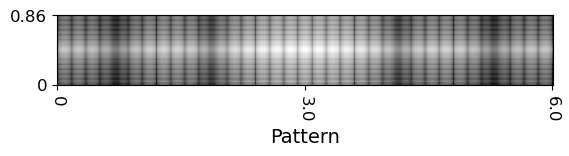

In [4]:
x_pos = np.array([0, pointsb-1, (pointsb-1)/2])
xlabels = np.array(["0", "{:}".format(b), "{:}".format(b/2)])

plt.xticks(x_pos, xlabels, color = 'black', rotation = -90, fontsize = '12', horizontalalignment = 'center')

y_pos = np.array([0, pointsc-1])
ylabels = np.array(["{:.2f}".format(c), "0"])

plt.yticks(y_pos, ylabels, color = 'black', rotation = 0, fontsize = '12', horizontalalignment  = 'right')


ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
plt.xlabel("Pattern", fontsize = 14)
plt.imshow(intensities, cmap=cm.gray, norm=LogNorm())

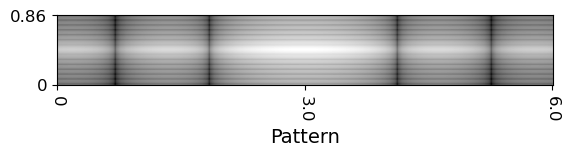

In [7]:
import plotly.express as px

xp = xp1
yp = np.linspace(-h/2, h/2, pointsh)

sgridx, sgridy = np.meshgrid(xp, yp)
sgridx = sgridx.flatten()
sgridy = sgridy.flatten()

intensities = np.zeros((pointsc, pointsb))

for i in range(pointsc):
    for j in range(pointsb):
        intensities[i, j] = intensity(X[i, j], Y[i, j])

        x_pos = np.array([0, pointsb-1, (pointsb-1)/2])
xlabels = np.array(["0", "{:}".format(b), "{:}".format(b/2)])

plt.xticks(x_pos, xlabels, color = 'black', rotation = -90, fontsize = '12', horizontalalignment = 'center')

y_pos = np.array([0, pointsc-1])
ylabels = np.array(["{:.2f}".format(c), "0"])

plt.yticks(y_pos, ylabels, color = 'black', rotation = 0, fontsize = '12', horizontalalignment  = 'right')


ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
plt.xlabel("Pattern", fontsize = 14)

plt.imshow(intensities, cmap=cm.gray, norm=LogNorm())
